# Deconvolution

In [79]:
#Importing the libraries to watch the 'fits' image and get the data array
import astropy
#import plotly.graph_objects as go
from astropy.io import fits
#Importing a library that is useful to read the original file
import pandas as pd
import pylab as plb
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
#Importing a visual library with some illustrative set up
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors 
from matplotlib import cm
import numpy as np
import math 
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (16, 8) 
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
plt.rcParams["axes.grid"] = False

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']
cmap_big = cm.get_cmap('Spectral', 512)
cmap = mcolors.ListedColormap(cmap_big(np.linspace(0.7, 0.95, 256))) 
bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

First step we import filtered dataset. (wavelet)

In [80]:
dataset = pd.read_csv('reconstruction.csv')
dataset = dataset.drop(columns=['Unnamed: 0'])


In [81]:
data=pd.read_csv('deconv.csv',sep=';')

In [82]:
data=data.rename(columns={'Data':'Day','Godzina':'hour','Minuty':'minute','Wolumen':'Load'})

In [83]:
data['Load'] = dataset.R

In [84]:
data.head()

,Day,hour,minute,Load
0,2008-01-01,0,15,-2074.271908
1,2008-01-01,0,30,-2074.271908
2,2008-01-01,0,45,-1468.293424
3,2008-01-01,1,0,-1468.293424
4,2008-01-01,1,15,-1859.735795


Coverting data into DateTime objects.

In [85]:
data.Day = pd.to_datetime(data.Day)

In [86]:
data.Day = pd.to_datetime(data.Day)
data['year'] = data.Day.dt.year
data['month'] = data.Day.dt.month
data['day'] = data.Day.dt.day

In [87]:
data['month'] = data.Day.dt.month

In [88]:
data['day'] = data.Day.dt.day

In [89]:
data['weekday']=data.Day.dt.day_name()

In [91]:
data.head()

,Day,hour,minute,Load,year,month,day,weekday
0,2008-01-01,0,15,-2074.271908,2008,1,1,Tuesday
1,2008-01-01,0,30,-2074.271908,2008,1,1,Tuesday
2,2008-01-01,0,45,-1468.293424,2008,1,1,Tuesday
3,2008-01-01,1,0,-1468.293424,2008,1,1,Tuesday
4,2008-01-01,1,15,-1859.735795,2008,1,1,Tuesday


Distinguish Holidays from weekdays

In [92]:
import holidays
pl_holidays = holidays.Poland()

In [93]:
from datetime import date
Days = data.day.tolist()
Months = data.month.tolist()
Years = data.year.tolist()
hd = []
for i in range(len(data)):
    if date(Years[i], Months[i], Days[i]) in pl_holidays : 
            hd.append(1)
    else : 
        hd.append(0)
data['holidays'] = hd

In [94]:
data.head()

,Day,hour,minute,Load,year,month,day,weekday,holidays
0,2008-01-01,0,15,-2074.271908,2008,1,1,Tuesday,1
1,2008-01-01,0,30,-2074.271908,2008,1,1,Tuesday,1
2,2008-01-01,0,45,-1468.293424,2008,1,1,Tuesday,1
3,2008-01-01,1,0,-1468.293424,2008,1,1,Tuesday,1
4,2008-01-01,1,15,-1859.735795,2008,1,1,Tuesday,1


In [95]:
weekdays = data.weekday.drop_duplicates().tolist()
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

Building kernel functions for weekdays and weekend without holidays.

In [97]:
Mean = []
for w in weekdays:
    W = data[data['weekday'] == w]
    W = W[W['holidays'] == 0]
    W_Day = W.Day.drop_duplicates().tolist()
    mean = pd.DataFrame()
    mean = np.zeros(96)
    k = 0
    for d in W_Day:
        value = W[W['Day'] == d].Load
        try :
            mean =  mean + np.asarray(value)
            k = k+1
        except : 
            continue
            
    mean = mean/k
    Mean.append(mean)

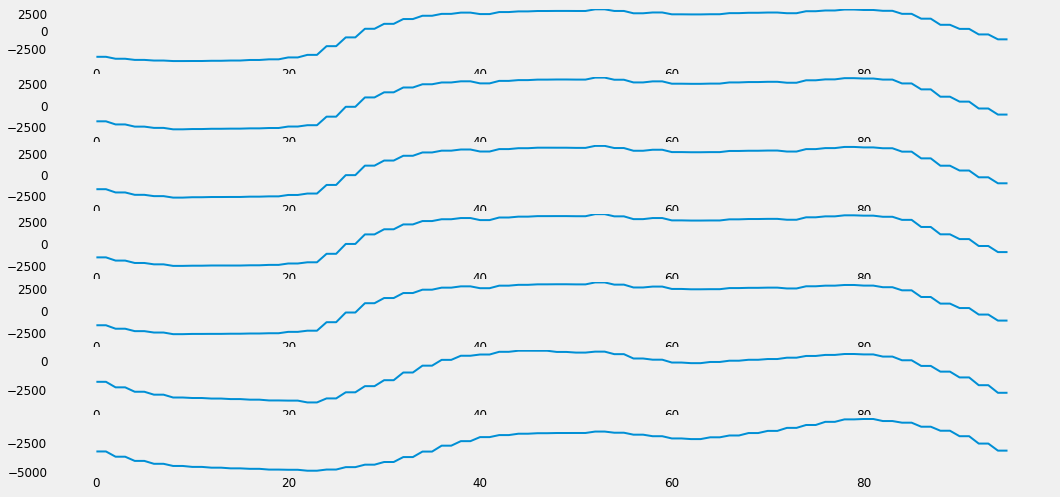

In [98]:
plt.figure(1)
plt.subplot(711)
plt.plot(Mean[0])
plt.subplot(712)
plt.plot(Mean[1])
plt.subplot(713)
plt.plot(Mean[2])
plt.subplot(714)
plt.plot(Mean[3])
plt.subplot(715)
plt.plot(Mean[4])
plt.subplot(716)
plt.plot(Mean[5])
plt.subplot(717)
plt.plot(Mean[6])


In [99]:
d=data.Day.drop_duplicates()

In [101]:
Ferial = np.array(Mean[0]) + np.array(Mean[1]) + np.array(Mean[2]) + np.array(Mean[3]) + np.array(Mean[4]) 
Ferial=Ferial/5.
Ferial=Ferial/Ferial.sum()

([<matplotlib.lines.Line2D at 0x7fbbf64a2940>], 0.010416666666666664)

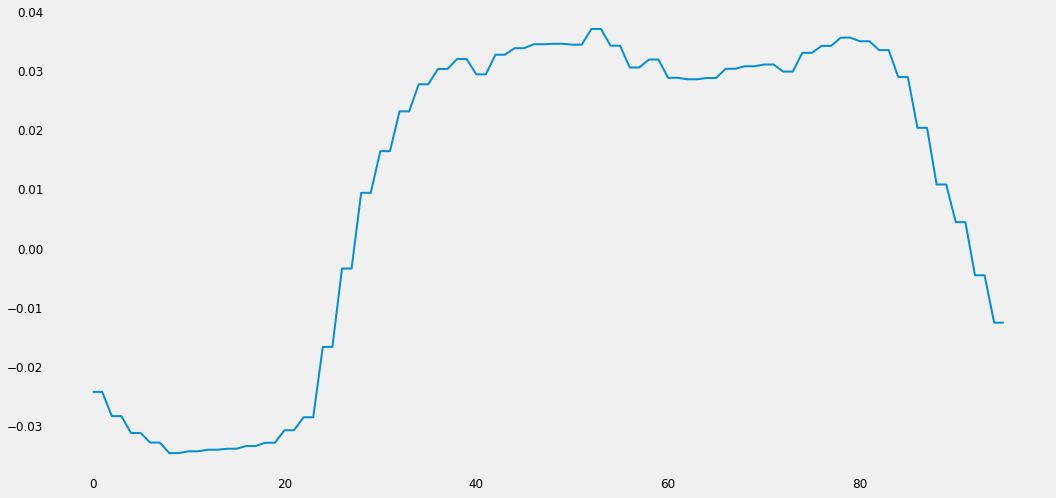

In [102]:
plt.plot(Ferial),Ferial.mean()


In [103]:
we= np.array(Mean[5])+np.array(Mean[6])
we=we/2.
we=we/we.sum()

In [104]:
day=data.Day.drop_duplicates()

## Building the delta signal for convolution

Some days are longer than others, while other days were snaller.
We fix this in the following way.

In [105]:
MAX=[]
PROB_D=[]
DAY=np.array(day)
for t in range(len(DAY)-1):
    startdata=data[(data.Day==DAY[t])].index.tolist()[0]
    enddata=data[(data.Day==DAY[t+1])].index.tolist()[0]
    if enddata-startdata!=96:
        PROB_D.append(DAY[t])
        
    arr_= np.array(data.Load.loc[startdata:enddata])
    
    #arr_= arr_-arr_.mean()
    MAX.append(arr_.max())
    #print(t,len(DAY)-1)

In [106]:
OLD_PROB_D=PROB_D.copy()

In [107]:
fix_data=data.copy()
I=np.arange(0,len(OLD_PROB_D)+1,1)
for i in range(len(I)-1):
    if i%2==0:
        to_add=fix_data.loc[fix_data[(fix_data.Day==OLD_PROB_D[I[i+1]]) & (fix_data.hour==2)].index.tolist()[0:4]].Load
        line = fix_data.loc[to_add.index[0]:to_add.index[0]+3]
        start=fix_data[(fix_data.Day==OLD_PROB_D[I[i]]) & (fix_data.hour==1)].index.max()+1
        try_data=fix_data.copy()
        try_data=try_data.drop(np.arange(start,len(data)))
        fix_data=try_data.append(line,ignore_index=True)
        fix_data.loc[len(fix_data)-4:len(fix_data)].Day=np.repeat(OLD_PROB_D[I[i]],4)
        fix_data=fix_data.append(data.loc[fix_data.index.max()-3:len(data)])
        fix_data=fix_data.drop(line.index)

/Users/Simone/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Fix data is used to build Delta Signal

In [108]:
data=fix_data

In [109]:
MAX=[]
PROB_D=[]
#data=data.reset_index()
RANGE=np.arange(0,len(fix_data),96)
for t in RANGE:
    MAX.append(fix_data.loc[t:t+96-1].Load.max())

In [110]:
def build_day(k):
    day=np.zeros(96)
    day[0]=k
    return day

In [111]:
DELTA=[]
for m in MAX:
    DELTA.append(build_day(m))
#DELTA=np.abs(DELTA)

In [112]:
DELTA=np.array(DELTA).ravel()

In [118]:
data['r']=DELTA

In [119]:
fix_data['r']=DELTA

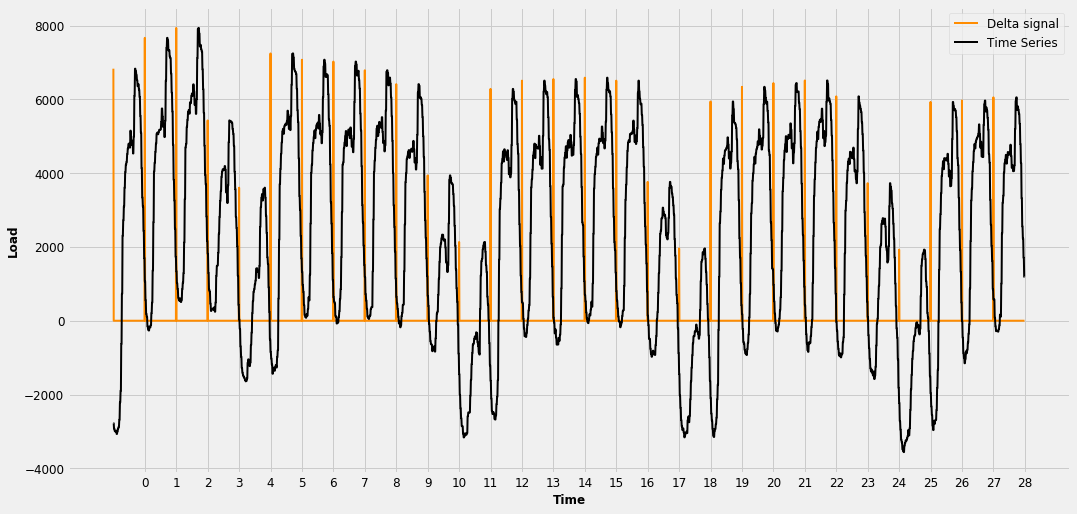

In [143]:
plt.plot(np.array(fix_data.r[96:96*30]),'Darkorange', label = 'Delta signal')
plt.plot(np.array(fix_data.Load[96:96*30]),'k', label = 'Time Series')
plt.grid(True)
plt.ylabel('Load')
plt.xlabel('Time')
plt.xticks(np.arange(96,96*30,96),np.arange(0,30))
plt.legend()
plt.show()

In [121]:
data=fix_data

In [122]:
YEARS=data.year.drop_duplicates().tolist()

Each specific day of the months for each year has been stored
e.g.
The first Monday of the third week of May
the second Friday of the first week of April

In [123]:
TOT=[]
for m in range(1,13):
    DAYS=[]
    for d in weekdays:
        mon=data[data['weekday']==d]
        W=[]
        J=np.arange(0,96*7,96)
        K=[]
        for j in range(len(J)):
            j_rel=np.zeros(96)
            k=0
            for y in range(len(YEARS)-1):
                try:
                    add=np.array(mon[(mon['month']==m)&(mon.year==YEARS[y])].reset_index().loc[J[j]:J[j]+95].r)
                    j_rel=j_rel+add
                    k=k+1
                except:
                    continue
            K.append(k)
            W.append(j_rel/k)
        DAYS.append(W)
    
    TOT.append(DAYS)

/Users/Simone/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


The calendar of 2016 has been buit

In [144]:

cal=pd.DataFrame({'Day':data['Day'],'month':data['month'],'year':data['year'],'Weekday':data['weekday']})
cal['hour']=data.hour
cal['minute']=data.minute
cal=cal[cal['year']==2016]

In [145]:

NEW_Z=[]
for k in range(1,13):
    mese=cal[cal['month']==k]
    mese=mese.reset_index().drop(columns=['index'])
    z=[]
    for j in range(1,6):
        sett=mese.loc[(j-1)*7*96:96*(j)*7]
        #print(j-1)
        ZERO=np.zeros(len(sett)-1)+j-1
        z.append(ZERO)
    new_z=[]
    for i in z:
        for j in i:
            new_z.append(j)
    new_z=new_z[0:len(mese)]+[new_z[len(new_z)-1]]
    NEW_Z.append(new_z)
    

In [146]:

ZERO_FIN=[]
for i in NEW_Z:
    for j in i:
        ZERO_FIN.append(j)

In [147]:
cal['n']=ZERO_FIN

In [148]:
tot_cal=cal.drop(columns=['hour','minute'])
tot_cal=tot_cal.drop_duplicates(subset='Day')

In [149]:
tot_cal=tot_cal.reset_index()

In [150]:
def week_to_number(day):
    if day=='Monday':
        i=0
    if day=='Tuesday':
        i=1
    if day=='Wednesday':
        i=2
    if day=='Thursday':
        i=3
    if day=='Friday':
        i=4
    if day=='Saturday':
        i=5
    if day=='Sunday':
        i=6
    return i

In [151]:
d_n=[]
for day in tot_cal.Weekday.tolist():
    d_n.append(week_to_number(day))

In [152]:
tot_cal['d_n']=d_n

The model of each day has been used to create a synthetic 2016

In [153]:
SIGNAL=np.array([])
for m in range(1,13):
    mon=tot_cal[tot_cal['month']==m]
    mon=mon.reset_index()
    
    for i in range(len(mon)):
            dn=int(mon.loc[i]['d_n'])
            N=int(mon.loc[i]['n'])
            SIGNAL=np.append(SIGNAL,TOT[m-1][dn][N])


Debugging the split years

In [154]:
bis_1=data[data.year==2008]
bis_2=data[data.year==2012]
first=np.array(bis_1[bis_1['Day']=='2008-02-29'].r)
second=np.array(bis_2[bis_2['Day']=='2012-02-29'].r)
bis=(first+second)/2.

In [155]:
a=np.argwhere(np.isnan(SIGNAL)).ravel().min()
b=np.argwhere(np.isnan(SIGNAL)).ravel().max()+1
SIGNAL[a:b]=bis

In [157]:
OLD_SIGNAL=SIGNAL.copy()

In [158]:
SIGNAL=np.abs(OLD_SIGNAL)

In [159]:
Ferial = np.array(Mean[0]) + np.array(Mean[1]) + np.array(Mean[2]) + np.array(Mean[3]) + np.array(Mean[4]) 
Ferial=Ferial/5.
Ferial=Ferial/Ferial.sum()
Old_Ferial=Ferial.copy()

In [160]:
Ferial = np.array(Mean[0]) + np.array(Mean[1]) + np.array(Mean[2]) + np.array(Mean[3]) + np.array(Mean[4]) 
Ferial=Ferial/5.
Ferial=Ferial/Ferial.sum()
Ferial=Ferial+Ferial.mean()-Ferial.min()-Ferial.max()

In [161]:
Ferial=Ferial/5.

In [162]:
Ferial=Ferial/Ferial.sum()

In [163]:
Ferial=Ferial+Ferial.mean()-Ferial.min()-Ferial.max()

Performing the convolution with Ferial days

In [166]:
X=signal.convolve(SIGNAL,Ferial)
X=X*(data.Load.max())/X.max()

In [167]:
test=np.array(data[data.year==2016].Load)

In [168]:
X=X[0:len(X)-95]

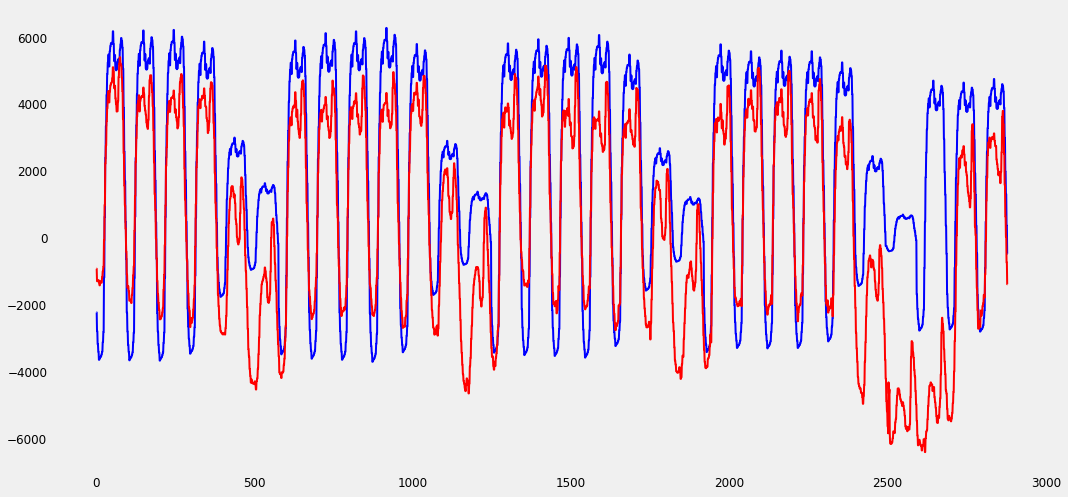

In [169]:
plt.plot(X[60*96:90*96],color='blue')
plt.plot(np.array(test)[60*96:90*96],color='red')
#error=np.array(test)[12*96:50*96]-original
#plt.plot(np.abs(error),color='black')

Building convolution for weekend days

In [170]:
start=20*96
end=(20+7*40)*96
prev=X[start:end]
t=np.arange(0,len(prev),1)

In [173]:
sat= np.array(Mean[6])
sat=sat-sat.min()
sat=sat/sat.sum()
sat=sat-sat.mean()

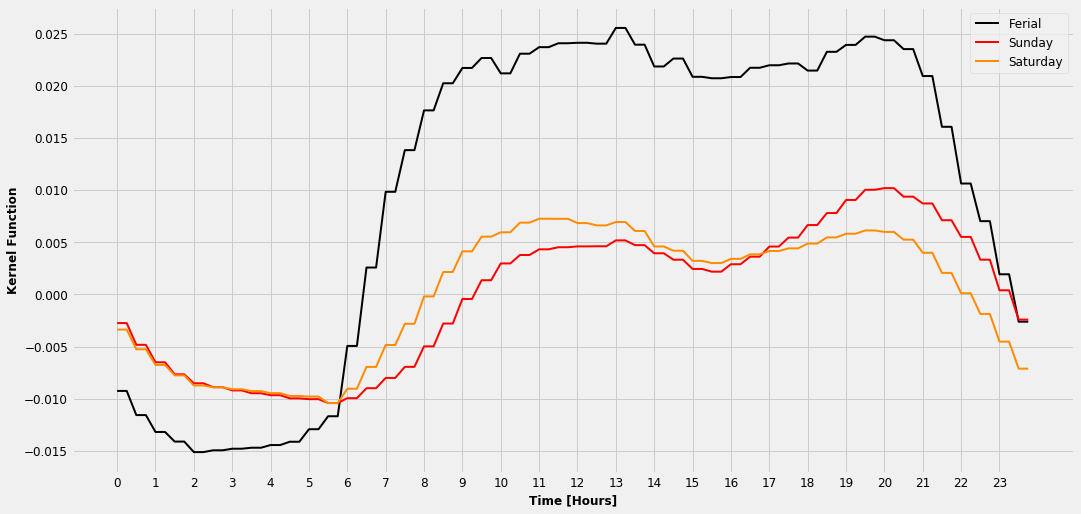

In [204]:
sun= np.array(Mean[6])
sun=sun-sun.min()
sun=sun/sun.sum()
sun=sun-sun.mean()
sat= np.array(Mean[5])
sat=sat-sat.min()
sat=sat/sat.sum()
sat=sat-sat.mean()
plt.plot(Ferial,'k',label = 'Ferial')
plt.plot(sun,'red',label = 'Sunday')
plt.plot(sat,'Darkorange',label = 'Saturday')
plt.legend()
plt.grid(True)
plt.ylabel('Kernel Function')
plt.xlabel('Time [Hours]')
plt.xticks(np.arange(0,96,4),np.arange(0,24))
plt.show()

Prediction using weekend days kernels for entire calendar.

In [175]:
SUN=signal.convolve(sun,SIGNAL)
SUN=SUN*data[data.year!=2016].Load.max()/SUN.max()
SAT=signal.convolve(sat,SIGNAL)
SAT=SAT*data[data.year!=2016].Load.max()/SAT.max()

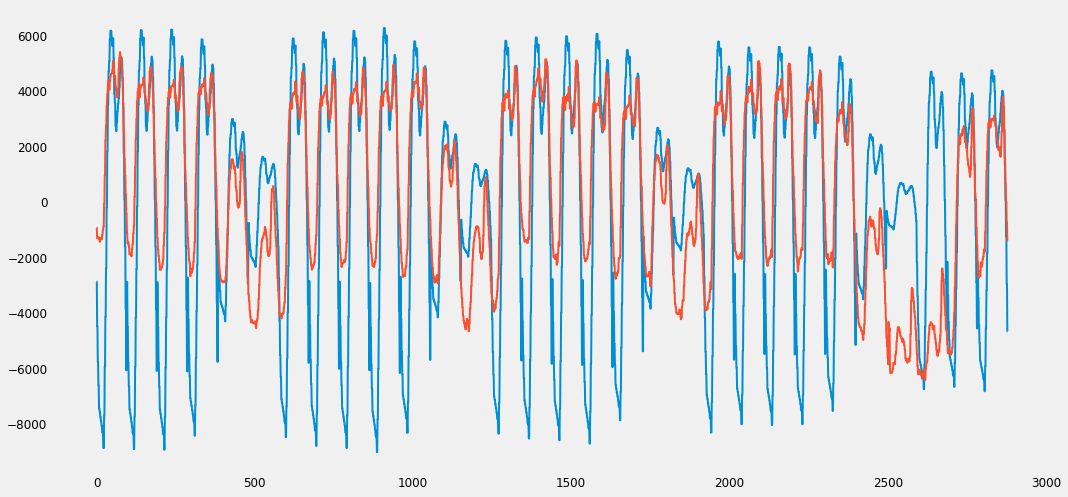

In [176]:
plt.plot(SAT[60*96:90*96])
plt.plot(test[60*96:90*96])

Dataset of the 3 Kernels reconstruction

In [ ]:
recons_data=data[data['year']==2016].copy()
recons_data['PSFFerial']=X[0:len(recons_data)]
recons_data['PSFSunday']=SUN[0:len(recons_data)]
recons_data['PSFSaturday']=SAT[0:len(recons_data)]

In [178]:
recons_data

,Day,hour,minute,Load,year,month,day,weekday,holidays,r,PSFFerial,PSFSunday,PSFSaturday
280512,2016-01-01,0,15,-3455.062485,2016,1,1,Friday,1,-899.33257,-1670.403464,-1245.816774,-2144.956980
280513,2016-01-01,0,30,-3455.062485,2016,1,1,Friday,1,0.00000,-1670.403464,-1245.816774,-2144.956980
280514,2016-01-01,0,45,-3596.348902,2016,1,1,Friday,1,0.00000,-2088.314188,-2189.782059,-3344.836643
280515,2016-01-01,1,0,-3596.348902,2016,1,1,Friday,1,0.00000,-2088.314188,-2189.782059,-3344.836643
280516,2016-01-01,1,15,-3937.495245,2016,1,1,Friday,1,0.00000,-2380.588172,-2946.752179,-4301.660577
280517,2016-01-01,1,30,-3937.495245,2016,1,1,Friday,1,0.00000,-2380.588172,-2946.752179,-4301.660577
280518,2016-01-01,1,45,-4245.911352,2016,1,1,Friday,1,0.00000,-2546.654961,-3469.244622,-4935.946678
280519,2016-01-01,2,0,-4245.911352,2016,1,1,Friday,1,0.00000,-2546.654961,-3469.244622,-4935.946678
280520,2016-01-01,2,15,-4654.313534,2016,1,1,Friday,1,0.00000,-2728.620420,-3858.403036,-5552.282963
280521,2016-01-01,2,30,-4654.313534,2016,1,1,Friday,1,0.00000,-2728.620420,-3858.403036,-5552.282963


In [180]:
psf_data=pd.DataFrame()
psf_data['weekday']=recons_data['weekday']
psf_data['Ferial']=recons_data.PSFFerial
psf_data['Sunday']=recons_data.PSFSunday
psf_data['Saturday']=recons_data.PSFSaturday
psf_data=psf_data.reset_index()

In [182]:
final_recons=np.array(psf_data.Ferial)
for i in range(35136):
    day_data=str(psf_data.loc[i].weekday)
    if day_data=='Sunday':
        final_recons[i]=psf_data.loc[i].Sunday
    if day_data=='Saturday':
        final_recons[i]=psf_data.loc[i].Saturday
        

Final Prediction

Text(0, 0.5, 'Load')

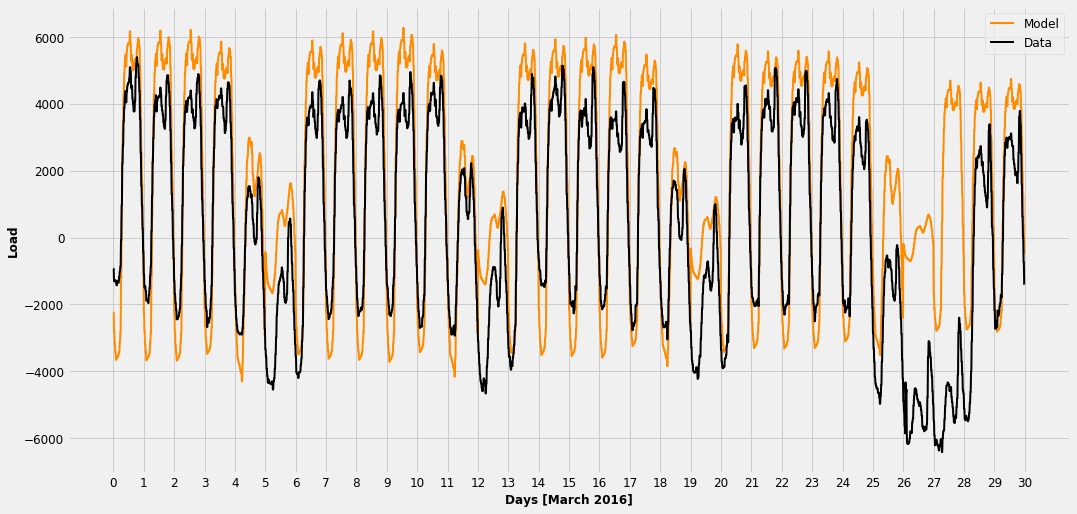

In [226]:
plt.plot(final_recons[60*96:90*96],color='Darkorange',label='Model')
plt.plot(test[60*96:90*96],color='k',label = 'Data')
plt.grid(True)
plt.legend()
plt.xticks(np.arange(0*96,31*96,96),np.arange(0,31))
plt.xlabel('Days [March 2016]')
plt.ylabel('Load')

In [214]:
from sklearn.metrics import mean_squared_error

In [216]:
finaldata=data[data['year']==2016].copy()
#finaldata['Prediction']=final_recons

In [217]:
finaldata.to_csv('pred.csv')

In [218]:
finaldata=pd.read_csv('pred.csv')

In [1158]:
test=np.array(finaldata.Load)
pred=np.array(final_recons)

In [29]:
from sklearn.metrics import mean_squared_error as mse

In [41]:
PERF=[np.corrcoef(test-pred,test)[0][1], np.sqrt(mse(pred[0*96:30*96],test[0*96:30*96])),np.sqrt(mse(pred[30*96::],test[30*96::]))/test[30*96::].max()]

In [45]:
print ('The correlation between the error and the original signal is '+str(PERF[0]))
print ('The RMSE for the first month of data is ' + str(PERF[1]))
print ('This RMSE is the '+str(PERF[2]*100) +'% of the maximum')

The correlation between the error and the original signal is 0.5527210360455695
The RMSE for the first month of data is 2150.0065611297596
This RMSE is the 31.388460685294987% of the maximum
